In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [10]:
#from transformers import BertTokenizer, BertModel, AutoModelForSequenceClassification, AdamW, get_scheduler
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')                                                     
#model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1735)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [4]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AdamW, get_scheduler
model_name = "sberbank-ai/sbert_large_nlu_ru"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1735)
#попробуем позже

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/sbert_large_nlu_ru and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
df = pd.read_csv("../../cleareddata1606.csv")
df

,Unnamed: 0,id,label,id2,g_id
0,0,304999800,прочее мясо рыбы включая фарш мороженые рыбный...,304999800,30499
1,1,604909900,растения засушенные обработанные антисептиком ...,604909900,60490
2,2,711400000,огурцы корнишоны консервированные для кратковр...,711400000,71140
3,3,712909000,овощи сущенные чеснок сушенный хлопья маркиров...,712909000,71290
4,4,803901000,бананы свежие зеленые сорта cavendish,803901000,80390
...,...,...,...,...,...
115093,180,8501523000,асинхронный двигатель переменного тока мощност...,8501523000,850152
115094,181,7308400009,стальная мелкощитовая опалубка в сборе и ее ча...,7308400009,730840
115095,182,7216619000,металлопрофиль фасонный из плоского проката хо...,7216619000,721661
115096,183,7306307209,трубы сварные круглого поперечного сечения ста...,7306307209,730630


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['g_id'] = pd.Series(df['g_id']).astype(str)

In [8]:
df

,id,label,id2,g_id
0,304999800,прочее мясо рыбы включая фарш мороженые рыбный...,304999800,030499
1,604909900,растения засушенные обработанные антисептиком ...,604909900,060490
2,711400000,огурцы корнишоны консервированные для кратковр...,711400000,071140
3,712909000,овощи сущенные чеснок сушенный хлопья маркиров...,712909000,071290
4,803901000,бананы свежие зеленые сорта cavendish,803901000,080390
...,...,...,...,...
115093,8501523000,асинхронный двигатель переменного тока мощност...,8501523000,850152
115094,7308400009,стальная мелкощитовая опалубка в сборе и ее ча...,7308400009,730840
115095,7216619000,металлопрофиль фасонный из плоского проката хо...,7216619000,721661
115096,7306307209,трубы сварные круглого поперечного сечения ста...,7306307209,730630


In [7]:
g_id = []
for id in df['g_id']:
    if len(id) == 6:
        g_id.append(str(id)[:6])
    else:
        g_id.append('0' + str(id)[:5])
df['g_id'] = g_id

In [9]:
df.value_counts('g_id')

g_id
950300    8479
401110    7409
330590    3082
870829    2533
850440    2453
          ... 
722100       1
852869       1
852852       1
722240       1
020714       1
Length: 1735, dtype: int64

In [11]:
df = df.drop(['id2'], axis=1, inplace=False)

In [12]:
df['id'] = df['g_id']
df = df.drop(['g_id'], axis=1, inplace=False)
df

,id,label
0,030499,прочее мясо рыбы включая фарш мороженые рыбный...
1,060490,растения засушенные обработанные антисептиком ...
2,071140,огурцы корнишоны консервированные для кратковр...
3,071290,овощи сущенные чеснок сушенный хлопья маркиров...
4,080390,бананы свежие зеленые сорта cavendish
...,...,...
115093,850152,асинхронный двигатель переменного тока мощност...
115094,730840,стальная мелкощитовая опалубка в сборе и ее ча...
115095,721661,металлопрофиль фасонный из плоского проката хо...
115096,730630,трубы сварные круглого поперечного сечения ста...


In [80]:
min_req = 20
filtered_classes = df.g_id.value_counts()[df.g_id.value_counts() > min_req].index.values

df = df[df.g_id.apply(lambda x: True if x in filtered_classes else False)]
df

,id,label,g_id
6,805102000,плоды цитрусовых культур апельсины свежие,0805
7,805210000,плоды цитрусовых культур мандарины свежие,0805
8,805290000,пробы и образцы для проведения работ по оценке...,0805
9,805501000,плоды цитрусовых культур лимоны свежие,0805
10,808108002,яблоки свежие в коробках сорт royal gala в...,0808
...,...,...,...
87483,1704907500,сливочные конфеты не содержащие какао тм sto...,1704
87484,1704907500,пищевой наполнитель для пром произв ва пищевой...,1704
87485,1704907500,тоффи карамели и аналогичные сладости не содер...,1704
87486,1704907500,кондитерские изделия из сахара не содержащие к...,1704


In [13]:
len(df['id'].unique())

1735

In [6]:
counts = df.value_counts('id')
df_count = pd.DataFrame(data={'id': counts.index, 'count': counts.values})

In [7]:
df_count

,id,count
0,8708299009,2488
1,3926909709,1308
2,8708999709,776
3,9503007500,770
4,8708109009,751
...,...,...
2605,4016950000,1
2606,8425390006,1
2607,4014900000,1
2608,4013100001,1


In [8]:
df_count.to_csv('../../tnveds_sort.csv')

In [9]:
df

,id,label
0,0304,прочее мясо рыбы включая фарш мороженые рыбный...
1,0604,растения засушенные обработанные антисептиком ...
2,0711,огурцы корнишоны консервированные для кратковр...
3,0712,овощи сущенные чеснок сушенный хлопья маркиров...
4,0803,бананы свежие зеленые сорта cavendish
...,...,...
115805,1207,кунжут семена кунжута очищенные не дробленные ...
115806,1207,образцы для сертификационных работ семена кунж...
115807,1207,семена кунжута
115808,1207,семена кунжута дробленые или недробленые


In [14]:
df = df[df['label'].notnull()]

In [11]:
df['label'] = df['label'].apply(lambda x: ' '.join(x.split()[:400]) if len(x.split())>400 else x)

C:\Users\yeril\AppData\Local\Temp\ipykernel_2652\2839864468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].apply(lambda x: ' '.join(x.split()[:400]) if len(x.split())>400 else x)


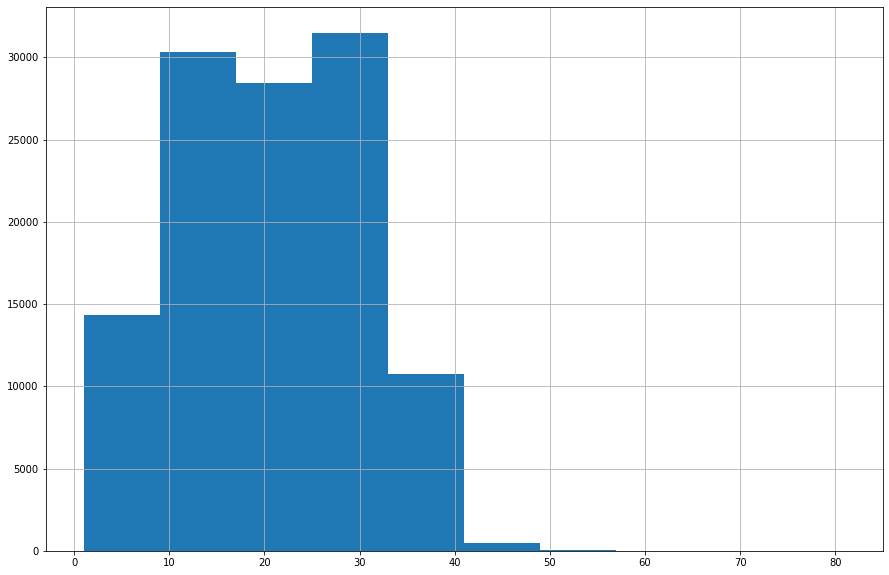

In [12]:
a = df['label'].apply(lambda x: len(x.split())).hist(figsize=(15, 10))

In [83]:
df['label'][df['label'].apply(lambda x: True if len(x.split()) == 1 else False)]

9755         патрубок
10006           хомут
15540          стулья
19710         домкрат
20438        расчёска
             ...     
86179            воск
86517         тoвары 
86655    аhтибиотики 
86931     дипиридaмол
87003     эторикоксиб
Name: label, Length: 92, dtype: object

In [15]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelEncoder()
Label_encoder.fit(df['id'])

LabelEncoder()

In [16]:
df['id'] = Label_encoder.fit_transform(df['id'])

/tmp/ipykernel_4122/1018509220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = Label_encoder.fit_transform(df['id'])


In [17]:
df

,id,label
0,1,прочее мясо рыбы включая фарш мороженые рыбный...
1,6,растения засушенные обработанные антисептиком ...
2,9,огурцы корнишоны консервированные для кратковр...
3,11,овощи сущенные чеснок сушенный хлопья маркиров...
4,16,бананы свежие зеленые сорта cavendish
...,...,...
115093,1303,асинхронный двигатель переменного тока мощност...
115094,831,стальная мелкощитовая опалубка в сборе и ее ча...
115095,781,металлопрофиль фасонный из плоского проката хо...
115096,816,трубы сварные круглого поперечного сечения ста...


In [18]:
df.columns = ['labels', 'description']

In [19]:
df

,labels,description
0,1,прочее мясо рыбы включая фарш мороженые рыбный...
1,6,растения засушенные обработанные антисептиком ...
2,9,огурцы корнишоны консервированные для кратковр...
3,11,овощи сущенные чеснок сушенный хлопья маркиров...
4,16,бананы свежие зеленые сорта cavendish
...,...,...
115093,1303,асинхронный двигатель переменного тока мощност...
115094,831,стальная мелкощитовая опалубка в сборе и ее ча...
115095,781,металлопрофиль фасонный из плоского проката хо...
115096,816,трубы сварные круглого поперечного сечения ста...


In [20]:
df.to_csv('../../cler_enc1606.csv', index=False)

In [21]:
np.save('./cl_classes1606.npy', Label_encoder.classes_)

In [22]:
df = df.sample(frac=1).reset_index(drop=True)
train = df[:int(len(df)*0.8)]
test =  df[int(len(df)*0.8):]

In [23]:
print(len(test['labels'].value_counts()))

1243


In [24]:
train.to_csv('../../train.csv', index=False)
test.to_csv('../../test.csv', index=False)

In [16]:
model.named_parameters

<bound method Module.named_parameters of BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [25]:
torch.cuda.empty_cache()
import gc
gc.collect()

8

In [5]:
#!pip install datasets

In [26]:
from datasets import load_dataset, load_metric
dataset = load_dataset('csv', data_files={'train': '../../train.csv', 'test': '../../test.csv'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /home/sincosxy/.cache/huggingface/datasets/csv/default-82da62dfc8b237c6/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
dataset = dataset.map(lambda e: tokenizer(e['description'], truncation = True, max_length=100, padding='max_length'), batched=True)

Map:   0%|          | 0/92076 [00:00<?, ? examples/s]

Map:   0%|          | 0/23020 [00:00<?, ? examples/s]

In [28]:
pytorch_style_columns = ['input_ids', 'token_type_ids', 'attention_mask', 'labels']  # 
dataset = dataset.remove_columns(set(dataset['train'].features.keys()) - set(pytorch_style_columns))

In [29]:
set(dataset['train'].features.keys())


{'attention_mask', 'input_ids', 'labels', 'token_type_ids'}

In [30]:
dataset.set_format(type='torch', columns=pytorch_style_columns, device='cuda') 

In [31]:
dataset.shape

{'train': (92076, 4), 'test': (23020, 4)}

In [48]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset['train'], shuffle=True, batch_size=108)
test_dataloader = DataLoader(dataset['test'], shuffle=False, batch_size=108)
#если есть видеопамять около 10гб, можно поставить 8

In [34]:
len(train_dataloader)

7673

In [35]:

optimizer = AdamW(model.parameters(), lr=2e-6)

num_epochs = 5

num_training_steps = num_epochs * len(train_dataloader)


lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=2000,
    num_training_steps=num_training_steps
)

/home/sincosxy/.local/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [36]:
torch.cuda.empty_cache()
import gc
gc.collect()

69

In [37]:
from tqdm import tqdm

In [38]:
#next(iter(train_dataloader))
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [39]:
num_epochs = 8

In [49]:
best_f1 = 0.
show_train_loss_every_num_epoch = 0.1

for epoch in range(num_epochs):
    print(40*'-', '\nepoch', epoch+1)
    model.train()
    losses = []

    for i, batch in enumerate(tqdm(train_dataloader)):
        model.train()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        losses.append(loss.item())

        #f i%int(len(train_dataloader)*show_train_loss_every_num_epoch)==int(len(train_dataloader)*show_train_loss_every_num_epoch)-1:
    print(f'train loss [{i*100/len(train_dataloader):.2f}%]: {np.array(losses).mean():.3f}')
    losses = []
    print('\nvalidating')

    f1 = load_metric('f1')
    acc = load_metric('accuracy')
    precision = load_metric('precision')
    recall = load_metric('recall')
    with torch.no_grad():
        model.eval()
                
        for batch in tqdm(test_dataloader):
        ##for batch in test_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            f1.add_batch(predictions=predictions, references=batch["labels"])    
            acc.add_batch(predictions=predictions, references=batch["labels"])    
            precision.add_batch(predictions=predictions, references=batch["labels"])    
            recall.add_batch(predictions=predictions, references=batch["labels"])    

        print('weighted summary:')
        print('Test acc:', acc.compute()['accuracy'])
        print('Test precision:', precision.compute(average = 'weighted')['precision'])
        print('Test recall:', recall.compute(average = 'weighted')['recall'])
        f1_weighted = f1.compute(average = 'weighted')['f1']
        print('Test f1:', f1_weighted, '\n')

        if f1_weighted > best_f1:
            best_f1 = f1_weighted
            model.save_pretrained("../../../../best_model2705")

    model.train()

---------------------------------------- 
epoch 1


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:26<00:00,  1.36it/s]
/tmp/ipykernel_4122/2511837063.py:25: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  f1 = load_metric('f1')


train loss [99.88%]: 6.884

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.93it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.13840139009556907
Test precision: 0.02796846429765053
Test recall: 0.13840139009556907
Test f1: 0.04429144897007112 

---------------------------------------- 
epoch 2


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:26<00:00,  1.36it/s]


train loss [99.88%]: 6.221

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.94it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.14365768896611641
Test precision: 0.0757983078061616
Test recall: 0.14365768896611641
Test f1: 0.07045197504843716 

---------------------------------------- 
epoch 3


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:25<00:00,  1.36it/s]


train loss [99.88%]: 5.742

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.93it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.2025629887054735
Test precision: 0.0898986789696513
Test recall: 0.2025629887054735
Test f1: 0.11245496638173899 

---------------------------------------- 
epoch 4


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:25<00:00,  1.36it/s]


train loss [99.88%]: 5.452

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.93it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.23753258036490008
Test precision: 0.12211489742470923
Test recall: 0.23753258036490008
Test f1: 0.14071812762103345 

---------------------------------------- 
epoch 5


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:25<00:00,  1.36it/s]


train loss [99.88%]: 5.211

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.93it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.25586446568201565
Test precision: 0.1338866191822757
Test recall: 0.25586446568201565
Test f1: 0.1589363058187806 

---------------------------------------- 
epoch 6


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:25<00:00,  1.36it/s]


train loss [99.88%]: 5.001

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.93it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.2719808861859253
Test precision: 0.148477081102234
Test recall: 0.2719808861859253
Test f1: 0.17573041393951164 

---------------------------------------- 
epoch 7


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:27<00:00,  1.36it/s]


train loss [99.88%]: 4.823

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.92it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.2875325803649001
Test precision: 0.16718805998996308
Test recall: 0.2875325803649001
Test f1: 0.19090965393305379 

---------------------------------------- 
epoch 8


100%|██████████████████████████████████████████████████████████████████████████████| 853/853 [10:27<00:00,  1.36it/s]


train loss [99.88%]: 4.661

validating


100%|██████████████████████████████████████████████████████████████████████████████| 214/214 [00:54<00:00,  3.91it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.3100781928757602
Test precision: 0.18757880252483727
Test recall: 0.3100781928757602
Test f1: 0.2146897003082572 



In [ ]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
Label_encoder = preprocessing.LabelEncoder()
Label_encoder.classes_ = np.load('./cl_classes1606.npy', allow_pickle=True)

true = []
preds = []

model.eval()
for batch in tqdm(test_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    true += batch["labels"].detach().cpu().numpy().tolist()
    preds += predictions.detach().cpu().numpy().tolist()

print(classification_report(Label_encoder.inverse_transform(true), Label_encoder.inverse_transform(preds)))

 84%|█████████████████████████████████████████████████████████████████▏            | 179/214 [00:45<00:08,  3.90it/s]

In [113]:
inputs = tokenizer('покрышки', truncation = True, max_length=100, padding='max_length', return_tensors="pt")
#batch = {k: torch.tensor(v).to(device) for k, v in txt.items()}
model.to(torch.device('cpu'))
with torch.no_grad():
    logits = model(**inputs).logits
predicted_class_id = logits.argmax().item()
#Label_encoder.inverse_transform(predicted_class_id)
a = []
a.append(predicted_class_id)

In [114]:
Label_encoder.inverse_transform([a])

array(['4011'], dtype=object)

In [17]:
def predict_class(text):
    model.to(torch.device('cpu'))
    inputs = tokenizer(text, truncation = True, max_length=100, padding='max_length', return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        predicted_class_id = logits.argmax().item()
        return Label_encoder.inverse_transform([predicted_class_id])


In [19]:
print(predict_class("Велосипед"), predict_class("велосипед"), predict_class("Велосипедов"))

['9503'] ['9503'] ['8714']
